#**Nasscom(Mini_project_Insurance_cost)**

#**Name: Amrutha S**

#**Roll No: 20191COM0007**

#**Section: 5COM1** 

**Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables, they are considering and the number of independent variables being used.**

**Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression.**

**Types of Linear Regression**
**Linear regression can be further divided into two types of the algorithm:**

**Simple Linear Regression: If a single independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Simple Linear Regression.**

**Multiple Linear regression: If more than one independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Multiple Linear Regression.**
          


# **Problem Statement**

**"Predict the charges to the Insurance policyholders. You can analyze all relevant data for the health insurance of a group of insurance policies and develop focused amount charge program."**

In [ ]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split

**Load The Dataset**

In [ ]:
#Import dataset
df=pd.read_csv("/content/insurance (1).csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


 **Data Preprocessing**

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Data cleaning**

In [ ]:
st = df.apply(LabelEncoder().fit_transform)

st.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,197,0,1,3,1005
1,0,1,350,1,0,2,57
2,10,1,331,3,0,2,306
3,15,1,73,0,0,1,1097
4,14,1,223,0,0,1,254


# **Data Visulization**

**Using the converted dataset, we can visualize the correlation heatmap**

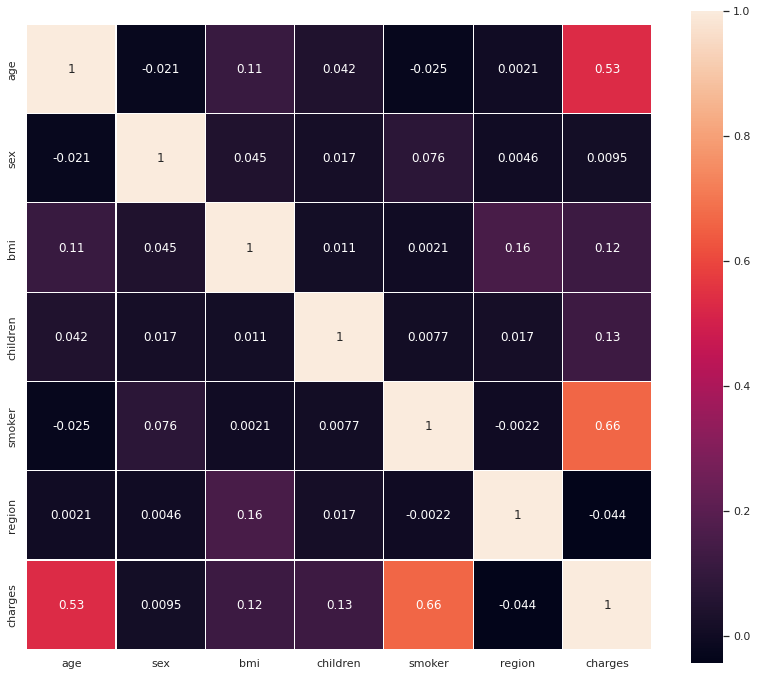

In [ ]:
sns.set(color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(st.astype(float).corr(), 
            linewidths=0.2, 
            square=True, 
            linecolor='white', 
            annot=True)
plt.show()

Seems like age and smoking weigh the most when looking at the charges row (or column). We expect the weights of these two to be higher than the rest.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


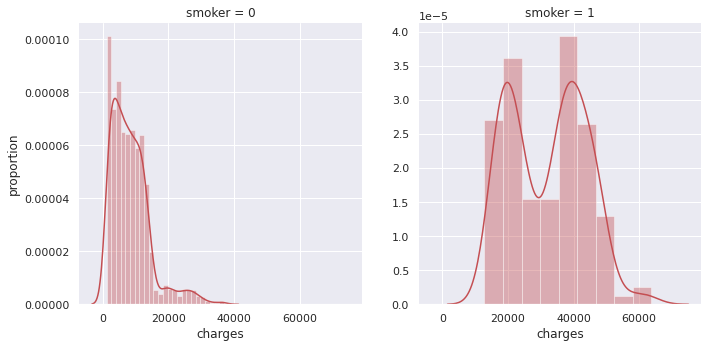

In [ ]:
g = sns.FacetGrid(df, col="smoker",  size= 5, sharey=False, sharex = True)
g.map(sns.distplot, "charges", color = 'r');
g.set_axis_labels("charges", "proportion");
g.despine(left=True)

smokers pay more for healtcare

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


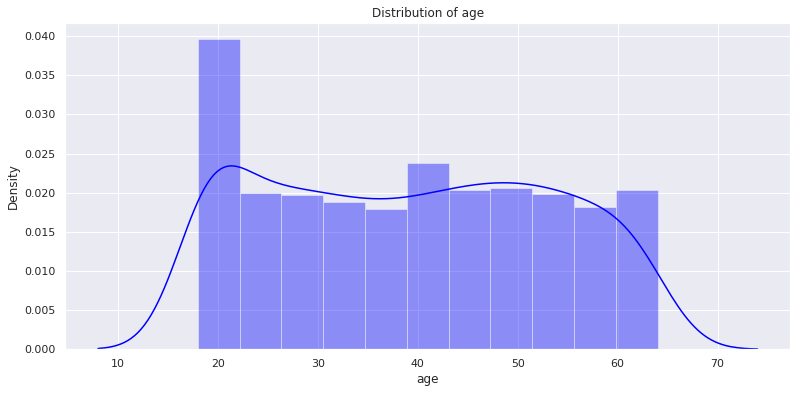

In [ ]:
plt.figure(figsize=(13,6))
plt.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'blue')

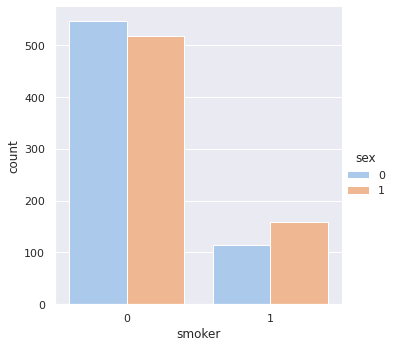

In [ ]:
sns.catplot(x="smoker", kind="count", hue = 'sex', data = df , palette='pastel');
plt.show()

the majority understands the downsides of smoking.

The data seems pretty balanced with a slight skew towards male.

**Model**

In [ ]:
df['age'] = df['age'].astype(float)
df['children'] = df['children'].astype(float)

df = pd.get_dummies(df)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0.0,1,3,16884.92400
1,18.0,1,33.770,1.0,0,2,1725.55230
2,28.0,1,33.000,3.0,0,2,4449.46200
3,33.0,1,22.705,0.0,0,1,21984.47061
4,32.0,1,28.880,0.0,0,1,3866.85520


In [ ]:
y=df['charges']
X=df.drop(columns=['charges'])

Since no testing data is provided, we will split the given dataset into training and testing sets.

In [ ]:
# use 10% of dataset as testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)

print('MSE train data: {:.5}, MSE test data: {:.5}'.format(lr_train_mse, lr_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(lr_train_mse)), 
    np.sqrt(np.absolute(lr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train,lr_train_pred),
    r2_score(y_test,lr_test_pred)))

MSE train data: 3.7005e+07, MSE test data: 3.2403e+07
RMSE train data: 6083.2, RMSE test data: 6083.2
R2 train data: 0.74907, R2 test data: 0.76512


In [ ]:
lr_cv = cross_val_score(LinearRegression(), X, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(lr_cv.mean(), lr_cv.std() * 2)) 

Accuracy: 0.75 (+/- 0.076)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X_poly =  PolynomialFeatures(degree = 2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.1, random_state=42)

In [ ]:
pr = LinearRegression().fit(X_train, y_train)

pr_train_pred = pr.predict(X_train)
pr_test_pred = pr.predict(X_test)

pr_train_mse = mean_squared_error(y_train,pr_train_pred)
pr_test_mse = mean_squared_error(y_test,pr_test_pred)


print('MSE train data: {:.5}, MSE test data: {}'.format(pr_train_mse, pr_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(pr_train_mse)), 
    np.sqrt(np.absolute(pr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train,pr_train_pred),
    r2_score(y_test,pr_test_pred)))

MSE train data: 2.3045e+07, MSE test data: 20507583.47749412
RMSE train data: 4800.6, RMSE test data: 4800.6
R2 train data: 0.84373, R2 test data: 0.85135


In [ ]:
pr_cv = cross_val_score(LinearRegression(), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(pr_cv.mean(), pr_cv.std() * 2)) 

Accuracy: 0.78 (+/- 0.11)


Now we have a better variance score using polynomial relationships

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 50).fit(X_train, y_train)

rfr_train_pred = rfr.predict(X_train)
rfr_test_pred = rfr.predict(X_test)


rfr_train_mse = mean_squared_error(y_train,rfr_train_pred)
rfr_test_mse = mean_squared_error(y_test,rfr_test_pred)


print('MSE train data: {:.5}, MSE test data: {:.5}'.format(rfr_train_mse, rfr_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(rfr_train_mse)), 
    np.sqrt(np.absolute(rfr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, rfr_train_pred),
    r2_score(y_test, rfr_test_pred)))

MSE train data: 3.4425e+06, MSE test data: 2.2808e+07
RMSE train data: 1855.4, RMSE test data: 1855.4
R2 train data: 0.97666, R2 test data: 0.83467


In [ ]:
rfr_cv = cross_val_score(RandomForestRegressor(n_estimators = 50), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(rfr_cv.mean(), rfr_cv.std() * 2)) 

Accuracy: 0.83 (+/- 0.089)


In [ ]:
from sklearn.linear_model import BayesianRidge

br = BayesianRidge().fit(X_train, y_train)

br_train_pred = br.predict(X_train)
br_test_pred = br.predict(X_test)


br_train_mse = mean_squared_error(y_train, br_train_pred)
br_test_mse = mean_squared_error(y_test, br_test_pred)


print('MSE train data: {:.5}, MSE test data: {:.5}'.format(br_train_mse, br_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(br_train_mse)), 
    np.sqrt(np.absolute(br_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, br_train_pred),
    r2_score(y_test, br_test_pred)))

MSE train data: 2.4919e+07, MSE test data: 2.029e+07
RMSE train data: 4991.9, RMSE test data: 4991.9
R2 train data: 0.83103, R2 test data: 0.85292


In [ ]:
br_cv = cross_val_score(BayesianRidge(), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(br_cv.mean(), br_cv.std() * 2)) 

Accuracy: 0.83 (+/- 0.069)


We can assume that the Random Forest wins with a variance score of 97% against training data, and 84% against data it has never seen before. It also has the lowest root MSE value.

With cross-validation, however, Bayesian regression gets the same average as the Random Forest but with a smaller standard deviation using 7 folds.

We do not have to worry about overfitting with Random Forest.

**colab link: https://colab.research.google.com/drive/15ao92irSmkc_oIEq-jJZncqxBNyZCNV3?usp=sharing**